In [12]:
import os
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np
from ribbn_scripts.processing.get_offset import get_offset
from ribbn_scripts.processing.phase_estimate import multidist_multifreq_phase_estimation
from ribbn_scripts.processing.localization import estimate_dph_df,direct_distance_estimate,estimate_k,unwrap_phases
from ribbn_scripts.ref_functions.spec_functions import read_network_analyzer_file, get_theta, get_amplitude, s2z
import pickle

In [13]:
# loading notes csv
notes = pd.read_csv('notes.csv')

In [14]:
notes

,Sno,Laser dist,Tape dist
0,0,30,30
1,1,32,32
2,2,34,34
3,3,36,36
4,4,38,38
5,5,40,40
6,6,42,42
7,7,44,44
8,8,46,46
9,9,48,48


In [15]:
df_all=None
file_names = sorted([f for f in os.listdir("dataframes") if f[0] != '.'], key=lambda x: int(x.split('.')[0]))
for file_name in file_names:
    dist_idx=int(file_name.split(".")[0])
    laser_dist=float(notes[notes['Sno']==dist_idx]['Laser dist'].iloc[0])
    tape_dist=float(notes[notes['Sno']==dist_idx]['Tape dist'].iloc[0])
    with open(f'dataframes/{file_name}', "rb") as f:
        print(file_name)
        _df = pickle.load(f)
        # Add new columns to _df for all rows
        _df['Run Exp Num'] = dist_idx
        _df['Laser dist'] = laser_dist/100
        _df['Tape dist'] = tape_dist/100
        if df_all is None:
            df_all=_df
        else:
            df_all = pd.concat([df_all, _df], ignore_index=True)

df_all

0.df
1.df
2.df
3.df
4.df
5.df
6.df
7.df
8.df
9.df
10.df
11.df
12.df
13.df
14.df
15.df
16.df
17.df
18.df
19.df
20.df
21.df


,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs,Laser dist,Tape dist
0,Tag1,Tag2,1.757352e+09,1.757352e+09,"[48.26, 42.76, 42.84, 42.76, 42.84, 43.14, 42....",915,0,5,0.30,0.30
1,Tag2,Tag1,1.757352e+09,1.757352e+09,"[59.47, 49.1, 49.1, 49.17, 49.55, 49.4, 49.4, ...",915,0,5,0.30,0.30
2,Tag1,Tag2,1.757353e+09,1.757353e+09,"[54.36, 46.96, 46.73, 46.58, 46.43, 46.96, 46....",915,1,5,0.32,0.32
3,Tag2,Tag1,1.757353e+09,1.757353e+09,"[65.42, 57.11, 56.8, 55.89, 56.34, 56.27, 56.7...",915,1,5,0.32,0.32
4,Tag1,Tag2,1.757353e+09,1.757353e+09,"[63.9, 60.77, 60.69, 60.39, 60.69, 60.54, 60.3...",915,2,5,0.34,0.34
5,Tag2,Tag1,1.757353e+09,1.757353e+09,"[66.72, 63.74, 64.13, 62.37, 64.28, 63.82, 62....",915,2,5,0.34,0.34
6,Tag1,Tag2,1.757353e+09,1.757353e+09,"[72.06, 68.25, 68.32, 68.7, 68.7, 68.4, 68.47,...",915,3,5,0.36,0.36
7,Tag2,Tag1,1.757353e+09,1.757353e+09,"[72.37, 72.67, 73.05, 72.67, 72.98, 72.06, 72....",915,3,5,0.36,0.36
8,Tag1,Tag2,1.757353e+09,1.757353e+09,"[85.72, 82.82, 82.67, 82.28, 82.59, 82.89, 82....",915,4,5,0.38,0.38
9,Tag2,Tag1,1.757353e+09,1.757353e+09,"[72.37, 78.16, 78.09, 78.32, 78.32, 78.47, 78....",915,4,5,0.38,0.38


In [16]:
df_all.to_csv('del.csv')

In [17]:
time_per_phase = 10/1000  # s
num_phases=6
num_mpps=df_all.iloc[0]['NumMPPs']
sampling_rate=1000
plotting=False
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase3","Phase4","Phase6","Phase7","Phase8",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
processedDF_aggregated=pd.DataFrame(columns=["Rx","Tx","phase", "median", "std","freq", "dist", 'delta', "Experiment Number", "Unique Exp Number"])

if plotting:
    plt.figure(figsize=(15,20))

unique_exp_no=0
phase_order=[1,3,4,6,7,8]

for df_idx in range(len(df_all)):

    voltages=df_all.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        3:[],
        4:[],
        6:[],
        7:[],
        8:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[phase_order[int(idx%num_phases)]].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            plt.subplot(len(df_all)//3+1, 3, df_idx+1)
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df_all.iloc[df_idx]["Rx"],
        "Tx":df_all.iloc[df_idx]["Tx"],
        "Voltages (mV)":df_all.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase6":phase_medians[6],
        "Phase7":phase_medians[7],
        "Phase8":phase_medians[8],
        "Frequency (MHz)":df_all.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df_all.iloc[df_idx]["Run Exp Num"],
        "Tape Dist (m)":df_all.iloc[df_idx]["Tape dist"],
        "Laser Dist (m)":df_all.iloc[df_idx]["Laser dist"],
        "Dist (m)":df_all.iloc[df_idx]["Laser dist"],
        "NumMPPs":df_all.iloc[df_idx]["NumMPPs"],
    }
    for phase in phase_order:
        entry_aggregated={
            "Rx":df_all.iloc[df_idx]["Rx"],
            "Tx":df_all.iloc[df_idx]["Tx"],
            "phase": str(phase),
            "median": np.mean(phase_medians[phase]), # mean of medians
            "std": np.std(phase_medians[phase]),
            "freq": df_all.iloc[df_idx]["Frequency (MHz)"]*1e6,
            "dist":df_all.iloc[df_idx]["Laser dist"],
            'delta': max(phase_medians[phase])-min(phase_medians[phase]),
            "Experiment Number":df_all.iloc[df_idx]["Run Exp Num"],
            "Unique Exp Number":unique_exp_no,
            "allVoltages": phase_medians[phase]
        }
        processedDF_aggregated=pd.concat([processedDF_aggregated, pd.DataFrame([entry_aggregated])], ignore_index=True)
    unique_exp_no+=1
    
    # Identify and print bad MPPs
    bad=False
    for k in phase_medians.keys():
        assert(len(phase_medians[k])==num_mpps)
        if np.std(phase_medians[k])>1:
            d=df_all.iloc[df_idx]["Laser dist"]
            print(f"<== Bad data found at {df_idx} df_idx at phase {k} at T2T dist {d}.", end="\t")
            print(f"Num vals: {len(phase_medians[k])}, mean: {np.mean(phase_medians[k])}, stdev: {np.std(phase_medians[k])} ==>")
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.plot(voltages,'.')
        plt.title(df_idx)
        plt.tight_layout()
        
if plotting:
    plt.show()
    

    

/var/folders/hm/7p8fzz2x2y10pbydpxcs7vw00000gn/T/ipykernel_43023/3544182281.py:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  processedDF_aggregated=pd.concat([processedDF_aggregated, pd.DataFrame([entry_aggregated])], ignore_index=True)


In [18]:
with open("processedDF.pkl", 'wb') as f:
    pickle.dump(processedDF,f)
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase3,Phase4,Phase6,Phase7,Phase8,Frequency (MHz),Run Exp Num,NumMPPs,Tape Dist (m),Laser Dist (m),Dist (m)
0,Tag1,Tag2,"[48.26, 42.76, 42.84, 42.76, 42.84, 43.14, 42....","[42.84, 42.84, 43.07, 42.84, 42.99]","[44.86, 44.75, 44.82, 45.015, 45.09]","[55.43, 55.39, 55.54, 55.73, 55.69499999999999]","[47.88, 47.84, 48.03, 48.1, 48.1]","[45.51, 45.59, 45.625, 45.55, 45.78]","[43.07, 43.07, 43.26, 43.22, 43.26]",915,0,5,0.30,0.30,0.30
1,Tag2,Tag1,"[59.47, 49.1, 49.1, 49.17, 49.55, 49.4, 49.4, ...","[49.32, 49.21, 49.48, 49.325, 49.21]","[48.335, 48.33, 48.18, 48.03, 48.41]","[59.97, 59.74, 60.31, 59.55, 59.62]","[62.6, 63.285, 63.25, 62.485, 62.905]","[59.78, 59.78, 59.28, 59.4, 59.165000000000006]","[53.905, 54.135000000000005, 53.98, 53.825, 54...",915,0,5,0.30,0.30,0.30
2,Tag1,Tag2,"[54.36, 46.96, 46.73, 46.58, 46.43, 46.96, 46....","[46.73, 46.614999999999995, 46.73, 46.81, 46.7...","[49.59, 49.55, 49.55, 49.71, 49.86]","[60.35, 60.5, 60.62, 60.54, 60.58]","[50.77, 50.735, 50.77, 50.7, 50.735]","[48.33, 48.41, 48.41, 48.49, 48.565]","[46.39, 46.43, 46.69, 46.69, 46.614999999999995]",915,1,5,0.32,0.32,0.32
3,Tag2,Tag1,"[65.42, 57.11, 56.8, 55.89, 56.34, 56.27, 56.7...","[56.5, 56.95, 56.875, 56.30500000000001, 56.61]","[53.29, 53.06, 53.06, 53.485, 54.400000000000006]","[68.095, 68.02, 67.675, 67.71, 69.05000000000001]","[66.985, 66.75999999999999, 66.795, 66.685, 67...","[61.495000000000005, 60.92, 61.61, 61.035, 61....","[56.04, 56.075, 56.345, 55.925, 56.08]",915,1,5,0.32,0.32,0.32
4,Tag1,Tag2,"[63.9, 60.77, 60.69, 60.39, 60.69, 60.54, 60.3...","[60.69, 60.39, 60.58, 60.5, 60.54]","[64.51, 64.24000000000001, 64.39, 64.35, 64.28]","[74.845, 74.58, 74.91999999999999, 74.65, 74.65]","[62.715, 62.56, 62.94499999999999, 62.79, 62.75]","[60.69, 60.85, 60.85, 60.655, 60.730000000000004]","[59.62, 59.62, 59.815, 59.855000000000004, 59.78]",915,2,5,0.34,0.34,0.34
5,Tag2,Tag1,"[66.72, 63.74, 64.13, 62.37, 64.28, 63.82, 62....","[63.82, 64.355, 64.545, 64.775, 64.35]","[59.239999999999995, 58.9, 58.519999999999996,...","[72.52000000000001, 72.33000000000001, 72.1, 7...","[66.30000000000001, 67.03, 69.05000000000001, ...","[61.035, 62.45, 62.675, 61.72, 61.875]","[57.565, 57.795, 57.754999999999995, 57.945, 5...",915,2,5,0.34,0.34,0.34
6,Tag1,Tag2,"[72.06, 68.25, 68.32, 68.7, 68.7, 68.4, 68.47,...","[68.47, 68.55000000000001, 68.55, 68.625, 68.63]","[73.245, 73.32, 73.32, 73.32, 73.39500000000001]","[82.16999999999999, 82.13, 82.095, 82.06, 82.13]","[68.89500000000001, 68.7, 68.93, 68.8950000000...","[67.215, 67.25, 67.28999999999999, 67.28999999...","[67.215, 67.25, 67.25, 67.28999999999999, 67.215]",915,3,5,0.36,0.36,0.36
7,Tag2,Tag1,"[72.37, 72.67, 73.05, 72.67, 72.98, 72.06, 72....","[72.59, 72.29, 72.785, 72.13499999999999, 71.985]","[66.83500000000001, 66.035, 66.41499999999999,...","[77.745, 77.59, 77.745, 78.32, 78.16499999999999]","[68.74000000000001, 69.01, 68.50999999999999, ...","[63.21, 63.36, 63.055, 63.325, 62.715]","[60.96, 61.42, 61.11, 61.075, 61.11]",915,3,5,0.36,0.36,0.36
8,Tag1,Tag2,"[85.72, 82.82, 82.67, 82.28, 82.59, 82.89, 82....","[82.67, 82.67, 82.745, 82.705, 82.89]","[87.85, 88.08, 88.19999999999999, 88.12, 88.275]","[93.045, 93.27, 93.27, 93.27, 93.35]","[79.84, 79.805, 79.92, 79.84, 79.88]","[79.23, 79.23, 79.27000000000001, 79.39, 79.195]","[80.57, 80.64500000000001, 80.795, 80.87, 80.72]",915,4,5,0.38,0.38,0.38
9,Tag2,Tag1,"[72.37, 78.16, 78.09, 78.32, 78.32, 78.47, 78....","[78.16, 78.55, 78.315, 79.12, 78.50999999999999]","[72.86, 72.785, 73.13, 73.32, 73.16999999999999]","[78.24, 78.19999999999999, 78.24, 78.32, 78.35...","[67.48, 67.48, 67.52000000000001, 67.9, 67.520...","[63.705, 63.59, 64.05, 64.05, 64.24000000000001]","[64.775, 64.69999999999999, 65.08, 65.08, 64.85]",915,4,5,0.38,0.38,0.38


In [19]:
processedDF_aggregated

,Rx,Tx,phase,median,std,freq,dist,delta,Experiment Number,Unique Exp Number,allVoltages
0,Tag1,Tag2,1,42.916,0.096457,915000000.0,0.3,0.230,0,0,"[42.84, 42.84, 43.07, 42.84, 42.99]"
1,Tag1,Tag2,3,44.907,0.126159,915000000.0,0.3,0.340,0,0,"[44.86, 44.75, 44.82, 45.015, 45.09]"
2,Tag1,Tag2,4,55.557,0.136587,915000000.0,0.3,0.340,0,0,"[55.43, 55.39, 55.54, 55.73, 55.69499999999999]"
3,Tag1,Tag2,6,47.990,0.109909,915000000.0,0.3,0.260,0,0,"[47.88, 47.84, 48.03, 48.1, 48.1]"
4,Tag1,Tag2,7,45.611,0.092865,915000000.0,0.3,0.270,0,0,"[45.51, 45.59, 45.625, 45.55, 45.78]"
...,...,...,...,...,...,...,...,...,...,...,...
259,Tag2,Tag1,3,54.575,0.408987,915000000.0,1.4,1.145,21,43,"[55.355000000000004, 54.21, 54.285, 54.4749999..."
260,Tag2,Tag1,4,54.249,0.238629,915000000.0,1.4,0.610,21,43,"[54.67, 54.06, 54.06, 54.36, 54.095]"
261,Tag2,Tag1,6,50.058,0.036139,915000000.0,1.4,0.110,21,43,"[50.05, 50.125, 50.015, 50.05, 50.05]"
262,Tag2,Tag1,7,49.568,0.161666,915000000.0,1.4,0.420,21,43,"[49.67, 49.55, 49.4, 49.4, 49.82]"


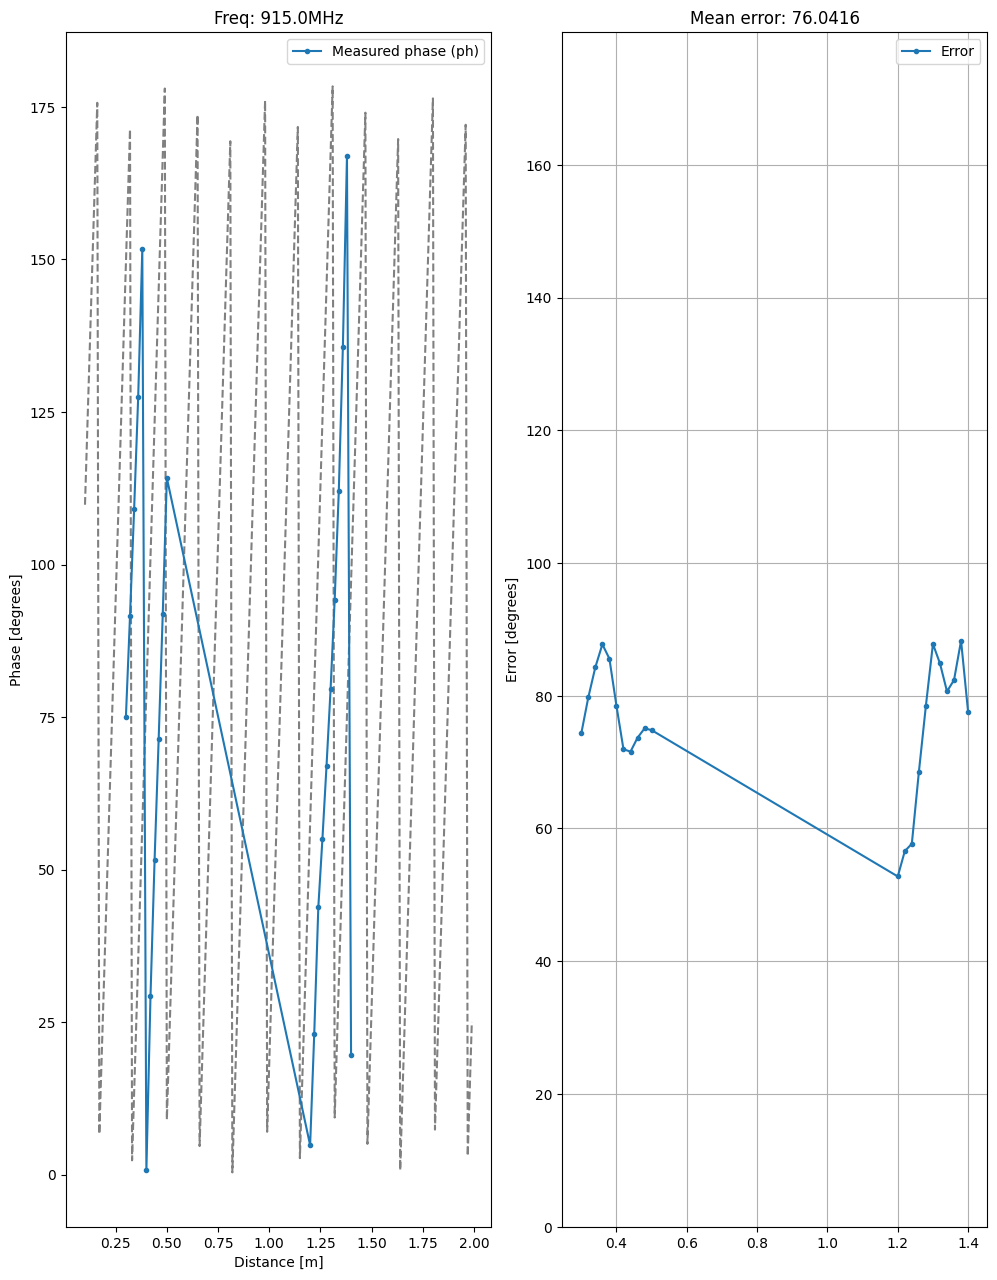

In [20]:
# freq_range=np.array(range(775,1000,10))*1e6
freq_range=np.array([915])*1e6
all_freqs, all_freqs_unwrapped, all_freqs_theoretical, all_freqs_theoretical_unwrapped, all_errors, \
    selected_experiments_all = multidist_multifreq_phase_estimation(freq_range,processedDF_aggregated,correction_factor=0,plot=True)

with open("no_correction_all_errs.pkl",'wb') as f:
    pickle.dump(all_errors,f)
    
with open("no_correction_all_phases.pkl",'wb') as f:
    pickle.dump(all_freqs,f)

with open("no_correction_all_phases_unwrapped.pkl",'wb') as f:
    pickle.dump(all_freqs_unwrapped,f)    

with open("theoretical_phase.pkl",'wb') as f:
    pickle.dump(all_freqs_theoretical,f)    

### With offset correction using the ground truth.

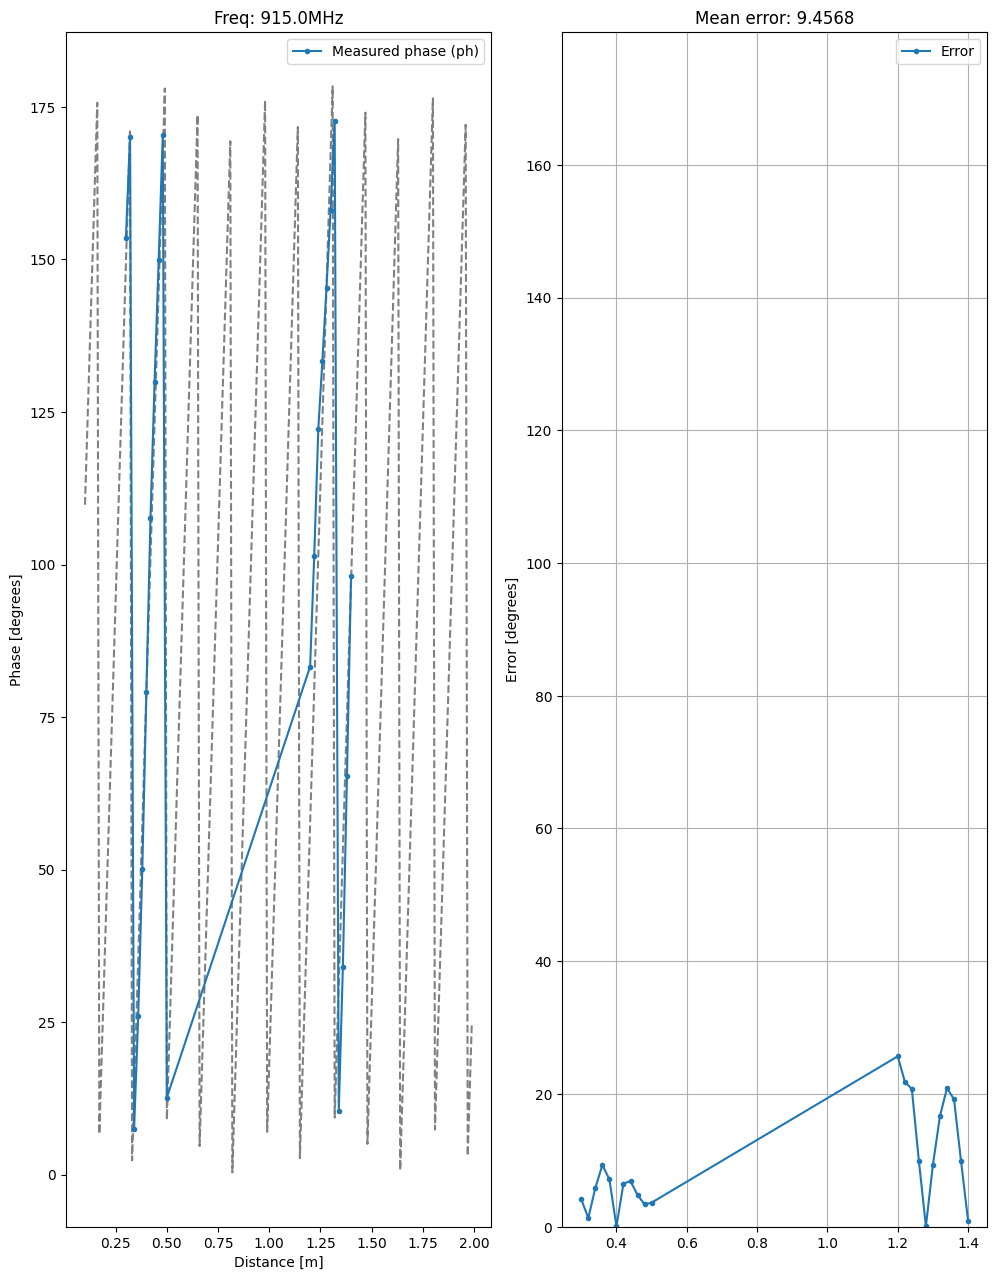

In [21]:
correction_offsets={}
all_errors=None


all_freqs, all_freqs_unwrapped, all_freqs_theoretical, all_freqs_theoretical_unwrapped, _,_=\
    multidist_multifreq_phase_estimation(freq_range,processedDF_aggregated,correction_factor=0,plot=False)


for freq in freq_range:
    offset,best_error,errors=get_offset(all_freqs[freq],freq)
    # print(f"Freq {freq//1e6};\t Mean:{np.mean(errors)};\t Median:{np.median(errors)};\t Std:{np.std(errors)}")
    # if all_errors is None:
    #     all_errors=errors
    # else:
    #     all_errors=np.concat((all_errors,errors))
    correction_offsets[freq]=offset



all_freqs, all_freqs_unwrapped, all_freqs_theoretical, all_freqs_theoretical_unwrapped, all_errors,_=\
    multidist_multifreq_phase_estimation(freq_range,processedDF_aggregated,correction_factor=correction_offsets,plot=True)


with open("gt_correction_all_errs.pkl",'wb') as f:
    pickle.dump(all_errors,f)
    
with open("gt_correction_all_phases.pkl",'wb') as f:
    pickle.dump(all_freqs,f)

with open("gt_correction_all_phases_unwrapped.pkl",'wb') as f:
    pickle.dump(all_freqs_unwrapped,f)    

### With correction offsets from pretrained

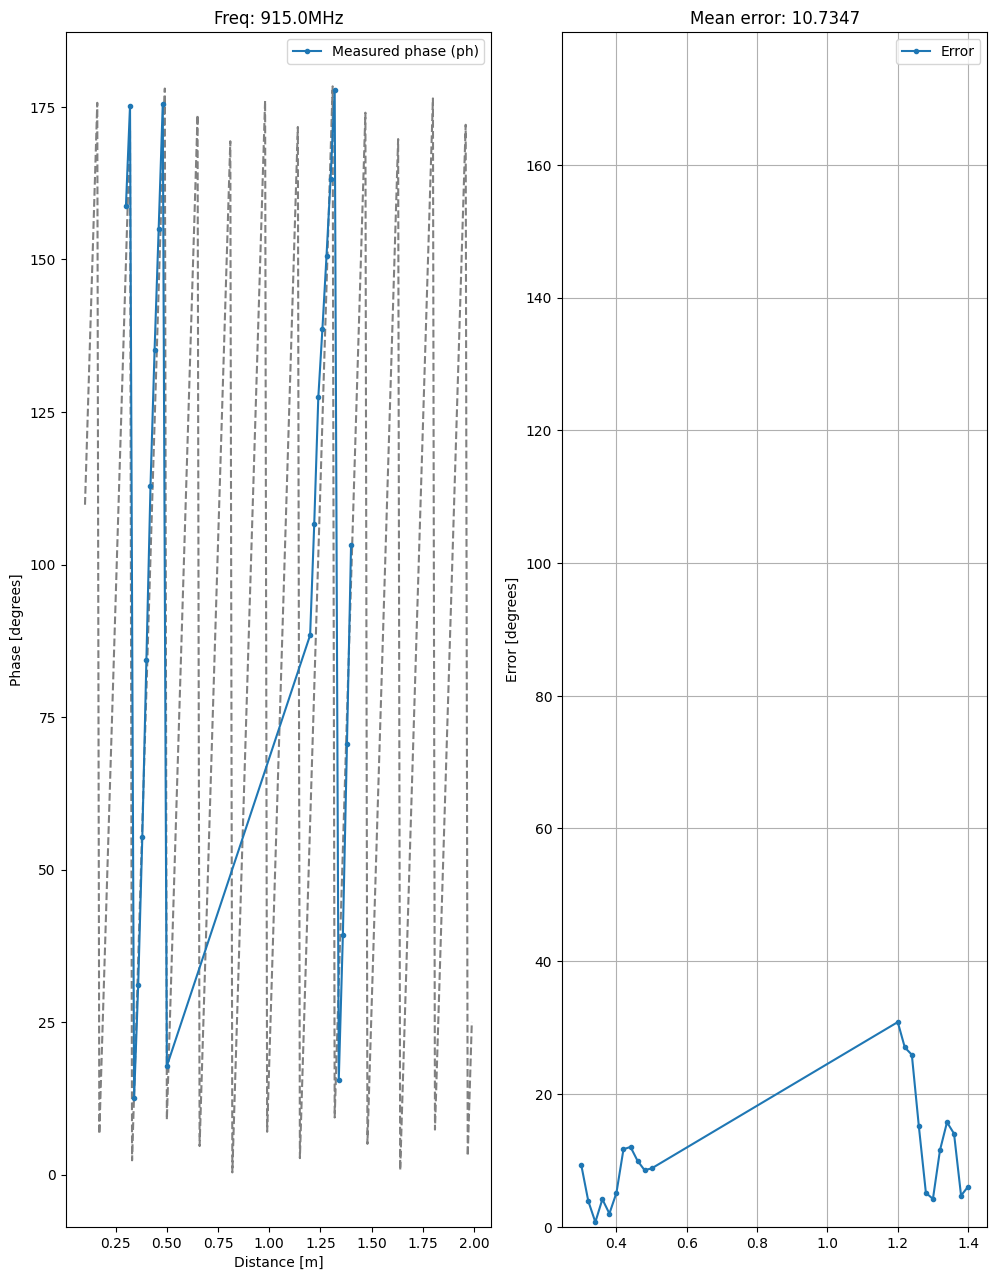

In [22]:
correction_offsets=pickle.load(open("/Users/manavjeet/git/T2TExperiments/DistExperiments/correction_offsets.pkl",'rb'))

all_freqs, all_freqs_unwrapped, all_freqs_theoretical, all_freqs_theoretical_unwrapped, all_errors,_=\
    multidist_multifreq_phase_estimation(freq_range,processedDF_aggregated,correction_factor=correction_offsets,plot=True)


with open("pretrained_correction_all_errs.pkl",'wb') as f:
    pickle.dump(all_errors,f)
    
with open("pretrained_correction_all_phases.pkl",'wb') as f:
    pickle.dump(all_freqs,f)

with open("pretrained_correction_all_phases_unwrapped.pkl",'wb') as f:
    pickle.dump(all_freqs_unwrapped,f)